# Podstawy programowania (AD) 2

## Tomasz Rodak


Wykład VIII

---

## Literatura

Na temat rekurencji (i nie tylko) bardzo polecam wykłady CS1 z Berkeley:

[Composing Programs](https://www.composingprograms.com/pages/17-recursive-functions.html)

Rekurencja na tych wykładach jest omawiana m. in. [tutaj](http://www.composingprograms.com/pages/17-recursive-functions.html) i [tutaj](http://www.composingprograms.com/pages/28-efficiency.html).

Warto również zajrzeć do legendarnego podręcznika [SICP](https://web.mit.edu/6.001/6.037/sicp.pdf). Programy prezentowane są tam w języku Scheme :-)



## Rekurencja


Funkcję nazywamy **rekurencyjną**, gdy wywołuje samą siebie. Wywołanie to może być bezpośrednie lub pośrednie. Implementacja rekurencji polega często na obserwacji, że rozwiązanie problemu dla pewnych szczególnych argumentów jest oczywiste, a dla argumentów ogólnych prosto wyraża się przez rozwiązanie **tego samego** problemu dla argumentów "prostszych", znajdujących się w jakimś sensie "bliżej" przypadku oczywistego.

**Przykład.** Chcemy napisać funkcję `suma_naturalnych(n)` zwracającą sumę kolejnych liczb naturalnych od `1` do `n`:
```
1 + 2 + ... + n
```

Przypadek szczególny to argument `n` równy `0`. Wtedy mamy sumę po zbiorze pustym, czyli `0`. Nic nie trzeba liczyć, wynik jest oczywisty. Dla `n` przekraczających `0` mamy przypadek ogólny, o którym myślimy tak: gdyby suma dla argumentu `n - 1` była już obliczona, to wynikiem byłaby wartość tej sumy powiększona o `n`. Inaczej mówiąc:
* `suma_naturalnych(0)` zwraca 0,
* `suma_naturalnych(n)` zwraca `n + suma_naturalnych(n - 1)` dla `n > 0`.


Implementacja rekurencyjna funkcji `suma_naturalnych()`:

```python
>>> def suma_naturalnych(n):
...     '''Zwraca 1 + 2 + ... + n'''
...     if n == 0:
...         return 0
...     return n + suma_naturalnych(n - 1)
>>> suma_naturalnych(5)
15
```

Przebieg wywołania `suma_naturalnych(5)`:
```
suma_naturalnych(5)
5 + suma_naturalnych(4)
5 + (4 + suma_naturalnych(3))
5 + (4 + (3 + suma_naturalnych(2)))
5 + (4 + (3 + (2 + suma_naturalnych(1))))
5 + (4 + (3 + (2 + (1 + suma_naturalnych(0)))))
5 + (4 + (3 + (2 + (1 + 0))))
5 + (4 + (3 + (2 + 1)))
5 + (4 + (3 + 3))
5 + (4 + 6)
5 + 10
15
```
Zauważ, że ten "wybrzuszający" się łańcuch operacji musi być zapamiętywany. Powiemy, że funkcja `suma_naturalnych()` jest **rekurencyjna** oraz, że jej wywołanie generuje **proces rekurencyjny**, czyli  buduje łańcuch odłożonych operacji, które muszą być zapamiętywane; im dłuższy proces, tym więcej operacji zostaje odłożonych.

W języku Python istnieje limit na liczbę odłożonych operacji. Przekroczenie tego limitu skutkuje wyjątkiem `RecursionError`:

```python
>>> import sys
>>> sys.getrecursionlimit()
3000
>>> suma_naturalnych(3000)
Traceback (most recent call last):
  ...
RecursionError: maximum recursion depth exceeded in comparison
>>> sys.setrecursionlimit(4000)
>>> suma_naturalnych(3000)
4501500
```

Nasza funkcja `suma_naturalnych()` nie ma zatem zbyt wielu zalet w porównaniu z tradycyjną implementacją za pomocą pętli. Nie dość, że zajmuje pamięć -- tym więcej im większe `n` -- to jeszcze do tego nie jest w stanie zwrócić wyniku  dla niedużego przecież `n` równego `3000`. 

Popatrzmy chwilę na nasze sumowanie zakodowane przy pomocy pętli `while`:

```python
>>> def suma_naturalnych(n):
...     '''Zwraca 1 + 2 + ... + n'''
...     k, suma = 0, 0
...     while k < n:
...         k += 1
...         suma += k
...     return suma
>>> suma_naturalnych(5)
15
```

W pętli obsługujemy dwie zmienne: kroczącą sumę `suma` i dodawaną wartość `k`. Tak samo będzie, gdybyśmy wykorzystali pętlę `for`, tyle że wtedy pętla sama zajmie się aktualizacją wartości `k`:

```python
>>> def suma_naturalnych(n):
...     '''Zwraca 1 + 2 + ... + n'''
...     suma = 0
...     for k in range(1, n + 1):
...         suma += k
...     return suma
>>> suma_naturalnych(5)
15
```

Okazuje się, że rekurencja potrafi odwzorować zwykłą pętlę `while` czy `for`. Zmienne (być może liczne) przetwarzane w pętli przekazuje się kolejnym wywołaniom rekurencyjnym za pomocą argumentów. Oto ilustracja dla funkcji `suma_naturalnych()`:

```python
>>> def sumuj(n, suma):
...     '''Zwraca suma + (1 + 2 + 3 + ... + n)'''
...     if n == 0:
...         return suma
...     return sumuj(n - 1, n + suma)
>>> def suma_naturalnych(n):
...     '''Zwraca 1 + 2 + ... + n'''
...     return sumuj(n, 0)
>>> suma_naturalnych(5)
15
```

W powyższej implementacji rekurencyjna jest funkcja `sumuj()`. Rozpiszmy przykładowy łańcuch wywołań:

```
suma_naturalnych(5)
sumuj(5, 0)
sumuj(4, 5)
sumuj(3, 9)
sumuj(2, 12)
sumuj(1, 14)
sumuj(0, 15)
15
```

Tym razem nie ma łańcucha odłożonych operacji, proces się nie "wybrzusza". Funkcja `sumuj()` jest rekurencyjna, ale implementuje **proces iteracyjny**; operacje dodawania wykonywane od razu i zapamiętywane w dodatkowej zmiennej `suma`. Z tego punktu widzenia rekurencyjność `sumuj()` jest jedynie własnością **składniową**, samo jednak wywołanie jest równoważne zwykłej pętli.

O funkcji rekurencyjnej powiemy, że jest **rekurencją ogonową**, jeśli wartość zwracana przez ostatnie wywołanie rekurencyjne jest finalną wartością zwracaną przez funkcję. W powyższym przykładzie ostatnie wywołanie to `sumuj(0, 15)`, które zwraca `15` co jest ostatecznym wynikiem. Tymczasem tutaj

```
suma_naturalnych(5)
5 + suma_naturalnych(4)
5 + (4 + suma_naturalnych(3))
5 + (4 + (3 + suma_naturalnych(2)))
5 + (4 + (3 + (2 + suma_naturalnych(1))))
5 + (4 + (3 + (2 + (1 + suma_naturalnych(0)))))
5 + (4 + (3 + (2 + (1 + 0))))
5 + (4 + (3 + (2 + 1)))
5 + (4 + (3 + 3))
5 + (4 + 6)
5 + 10
15
```

ostanim wywołaniem jest `suma_naturalnych(0)`, co oczywiście **nie jest** finalnym wynikiem. Żeby ten wynik uzyskać środowisko uruchmieniowe musi teraz wrócić przez wszystkie odłożone na stosie wywołania aż do pierwszego, które zwróci wartość i zakończy działanie funkcji. Dlatego `sumuj()` jest rekurencją ogonową, ale nie jest nią `suma_naturalnych()` zaprezentowana na górze strony.

Jeżeli środowisko "wie", że wywoływana rekurencja jest ogonowa, to wygenerowane po drodze wywołania może porzucać, gdyż i tak nie wpłyną na ostateczny wynik. Wywołanie `sumuj(4, 5)` nie musi być pamiętane, jeśli działa już kolejne wywołanie `sumuj(3, 9)`. Po zakończeniu działanie `sumuj(3, 9)` uruchamiane jest `sumuj(2, 12)`, zatem środowisko lokalne utworzone przez `sumuj(3, 9)` może zostać bez szkody zapomniane, itd.

Mówimy, że język programowania posiada **optymalizację ogonową** (*tail call optimization*), jeśli ma zdolność zapominania zbędnych odwołań rekurencyjnych w rekurencji ogonowej. Język Python takiej zdolności nie posiada. Mimo, że tworzenie łańcucha odłożonych operacji nie jest konieczne dla wywołania `sumuj()`, to i tak dla dużych `n` to wywołanie wysypuje się wyjątkiem `RecursionError`:

```python
>>> sumuj(3000, 1)
Traceback (most recent call last):
  ...
RecursionError: maximum recursion depth exceeded in comparison
```

Jeszcze jeden przykład -- prosta pętla odliczająca:

```python
>>> def odlicz(k):
...     '''Odlicza od k do 0'''
...     while k > 0:
...         print('Odliczanie:', k)
...         k -= 1
...     print('Start!:    ', 0)
>>> odlicz(5)
Odliczanie: 5
Odliczanie: 4
Odliczanie: 3
Odliczanie: 2
Odliczanie: 1
Start!:     0
```

 i zastępująca ją rekurencja ogonowa:

```python
>>> def odlicz(k):
...     '''Odlicza od k do 0'''
...     if k > 0:
...         print('Odliczanie:', k)
...         return odlicz(k - 1)
...     print('Start!:    ', k)
>>> odlicz(5)
Odliczanie: 5
Odliczanie: 4
Odliczanie: 3
Odliczanie: 2
Odliczanie: 1
Start!:     0
```

Sprawne korzystanie z rekurencji wymaga praktyki. W wielu językach programowania brak optymalizacji ogonowej, co powoduje, że rozwiązanie rekurencyjne jest często mniej wydajne niż równoważne rozwiązanie wykorzystujące pętle. Ponadto, niektóre języki programowania bardziej wspierają idiom rekurencji, inne mniej. Korzystanie z pętli w Pythonie, zwłaszcza z pętli `for` po kolekcjach, jest bardzo naturalne. Nie ma wielkiego sensu w zastępowaniu takiej pętli wymyślną rekurencją ogonową, która i tak nie zostanie zoptymalizowana. Z drugiej strony, w językach takich jak Lisp, jego dialekt [Scheme](https://www.gnu.org/software/mit-scheme/documentation/mit-scheme-ref/Iteration.html) czy [Haskell](http://learnyouahaskell.com/recursion) nie ma w ogóle instrukcji sterujących odpowiadających zwykłym pętlom `while` czy `for` z języków imperatywnych. Zachowanie pętli implementowane jest rekurencją (oczywiście ze wspieraną optymalizacją ogonową) lub wykonywane jest niejawnie przez wywołania funkcyjne. W tych językach stoswanie rekurencji jest bardzo naturalne. 

Rekurencja jest ogólniejsza od pętli, jednak rozwiązania wykorzystujące pętle uchodzą za łatwiejsze do zrozumienia. Zasada ta ma wiele wyjątków. Zdarza się, że rozwiązanie rekurencyjne jest znacznie prostsze do znalezienia niż jakiekowlwiek rozwiązanie za pomocą pętli. Przykładu dostarcza problem liczby podziałów liczby naturalnej, o którym możesz poczytać [tutaj](http://composingprograms.com/pages/17-recursive-functions.html#example-partitions) w *Composing Programs*. 

Bardzo ważna metodyka projektowania algorytmów [dziel i zwyciężaj](https://pl.wikipedia.org/wiki/Dziel_i_zwyci%C4%99%C5%BCaj) dostarcza wielu przykładów problemów z wydajnymi rozwiązaniami rekurencyjnymi. Czołowe przykłady to [wyszukiwanie binarne](https://pl.wikipedia.org/wiki/Wyszukiwanie_binarne), [sortowanie szybkie](https://pl.wikipedia.org/wiki/Sortowanie_szybkie) i [sortowanie przez scalanie](https://pl.wikipedia.org/wiki/Sortowanie_przez_scalanie).

## Rekurencja w ciągu Fibonacciego

### Definicja i analiza wydajności

Ciąg Fibonacciego matematycy definiują następująco:
$$F_0 := 0,\quad F_1 := 1$$
i dla $n\geqslant 2,$
$$F_n := F_{n-2} + F_{n-1}.$$

W wielu językach programowania definicja ta daje się wprost przełożyć na definicję funkcji obliczającej wyraz o indeksie `n`:

```python
>>> def fib(n):
...     '''Zwraca wyraz F_n, n >= 0 ciągu Fibonacciego.'''
...     if n == 0 or n == 1:
...         return n
...     return fib(n - 1) + fib(n - 2)
```

Łańcuch kolejnych wywołań i odłożonych operacji dla `fib(5)` ma postać:
```
fib(5)
fib(3) + fib(4)
(fib(1) + fib(2)) + fib(4)
(1 + fib(2)) + fib(4)
(1 + (fib(0) + fib(1))) + fib(4)
(1 + (0 + fib(1))) + fib(4)
(1 + (0 + 1)) + fib(4)
(1 + 1) + fib(4)
2 + fib(4)
2 + (fib(2) + fib(3))
2 + ((fib(0) + fib(1)) + fib(3))
2 + ((0 + fib(1)) + fib(3))
2 + ((0 + 1) + fib(3))
2 + (1 + fib(3))
2 + (1 + (fib(1) + fib(2)))
2 + (1 + (1 + fib(2)))
2 + (1 + (1 + (fib(0) + fib(1))))
2 + (1 + (1 + (0 + fib(1))))
2 + (1 + (1 + (0 + 1)))
2 + (1 + (1 + 1))
2 + (1 + 2)
2 + 3
5
```
[Tutaj](http://composingprograms.com/pages/28-efficiency.html) znajduje się przedstawienie ciągu wywołań dla `fib(6)` w postaci drzewa binarnego:
![image.png](http://www.composingprograms.com/img/fib.png)

Co widzimy? Ta rekurencja nie jest ogonowa -- generowany proces jest faktycznie rekurencyjny, i co więcej nie jest liniowy, lecz drzewiasty. Spodziewamy się, że już dla niewielkich `n` wywołania będą mało wydajne ze względu na liczbę powtórzeń jaka pojawia się w drzewie. Na przykład dla `fib(6)` wartość `fib(4)` jest obliczana dwa razy. Za chwilę zajmiemy się pytaniem, czy te wielokrotnie obliczane te same wywołania da się gdzieś zapamiętać, i dzięki temu poprawić wydajność. Teraz jednak zbadajmy eksperymentalnie, jaki jest czas wykonania `fib(n)` dla rosnącego `n`.  

```python
>>> import timeit
>>> timeit.timeit('fib(10)', globals=globals(), number=1_000_000) / 1_000_000
6.117947203005315e-06
>>> timeit.timeit('fib(20)', globals=globals(), number=1_000) / 1_000
0.0007805715260037686
>>> timeit.timeit('fib(30)', globals=globals(), number=10) / 10
0.09316594789997908
>>> timeit.timeit('fib(37)', globals=globals(), number=1) / 1
2.7001188330032164
```


Czas wykonania `fib(37)` jest rzędu kilku sekund. Oznacza, że dochodzimy do kresu, niewiele więcej kolejnych liczb Fibonacciego da się tym sposobem policzyć. Nawet jeśli będziesz dysponował znacznie szybszym komputerem, nie zmieni to istotnie obrazu sytuacji.

Czas dla `fib(41)` to już ponad 15 sekund:

```python
>>> timeit.timeit('fib(41)', globals=globals(), number=1) / 1
19.08029490300396
```

Dalszą analizę wykonamy w notatniku Jupyter, gdzie można łatwo rysować wykresy. 

Sprawdźmy jak skaluje się czas wykonania `fib(n)` wraz ze wzrostem `n`. Czas będziemy mierzyć funkcją `perf_counter()`. Zaniedbujemy małe `n`, gdyż dla nich czasy będą bardzo krótkie, a przez to jednorazowy pomiar narażony na duże niedokładności:

In [1]:
%%time
from time import perf_counter

def fib(n):
    if n < 2:
        return n
    else:
        return fib(n - 1) + fib(n - 2)

N, T = [], []
n_start, n_stop = 10, 37
# Rozmiary próbki dla poszczególnych n; 50 dla n < 30, 5 dla n >= 30
# Czas wykonania jest uśredniany dla każdej próbki
rozmiary_próby = [100 if n < 30 else 5 for n in range(n_start, n_stop + 1)]

for n, rozmiar_próbki in zip(range(n_start, n_stop + 1), rozmiary_próby):
    czasy = []
    for _ in range(rozmiar_próbki):
        start = perf_counter()
        w = fib(n)
        stop = perf_counter()
        czas = stop - start
        czasy.append(czas)
    N.append(n)
    T.append(sum(czasy) / rozmiar_próbki)
    print(f'{n:<3}: {w:<10}| Czas: {czas}')

10 : 55        | Czas: 1.1853000614792109e-05
11 : 89        | Czas: 1.4110992196947336e-05
12 : 144       | Czas: 2.1422994905151427e-05
13 : 233       | Czas: 4.2405998101457953e-05
14 : 377       | Czas: 6.19289930909872e-05
15 : 610       | Czas: 0.00010846700752153993
16 : 987       | Czas: 0.00016623700503259897
17 : 1597      | Czas: 0.0003700700035551563
18 : 2584      | Czas: 0.0007529720023740083
19 : 4181      | Czas: 0.0004202170093776658
20 : 6765      | Czas: 0.0006923509936314076
21 : 10946     | Czas: 0.0016161209932761267
22 : 17711     | Czas: 0.001906038000015542
23 : 28657     | Czas: 0.0029742789920419455
24 : 46368     | Czas: 0.004827292010304518
25 : 75025     | Czas: 0.0075771760020870715
26 : 121393    | Czas: 0.013218088002759032
27 : 196418    | Czas: 0.02107871499902103
28 : 317811    | Czas: 0.03499059200112242
29 : 514229    | Czas: 0.05782363899925258
30 : 832040    | Czas: 0.11132692199316807
31 : 1346269   | Czas: 0.1659235059923958
32 : 2178309   | Cz

Rysujemy wykres czasu wykonania względem `n`:

In [2]:
import matplotlib
matplotlib.rc('font', size=22)

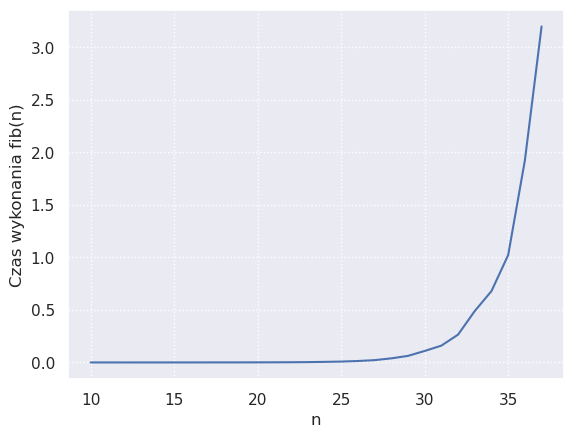

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()


plt.plot(N, T)
plt.xlabel('n')
plt.ylabel('Czas wykonania fib(n)')
plt.grid(ls=':')

Popatrzmy na stosunek czasu wykonania `fib(n + 1)` do `fib(n)`:

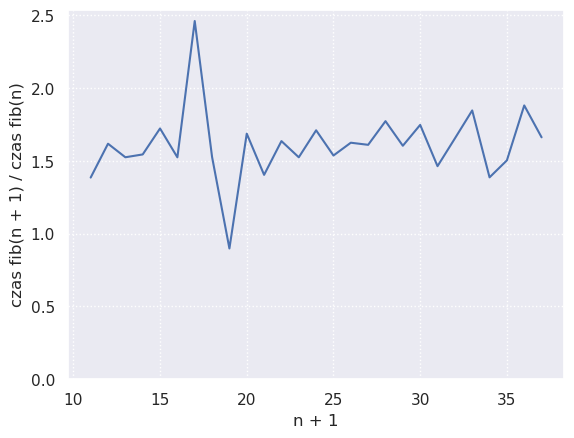

In [4]:
ilorazy = []
t0 = T[0]

for t in T[1:]:
    ilorazy.append(t / t0)
    t0 = t

plt.plot(range(n_start + 1, n_stop + 1), ilorazy)
plt.ylim(bottom=0)
plt.xlabel('n + 1')
plt.ylabel('czas fib(n + 1) / czas fib(n)')
plt.grid(ls=':')

Odchylenia od średniej mogą być spowodowane pracą systemu operacyjnego. Wykres ten będzie ulegał zmianie po każdorazowym przeliczeniu list `N` i `T`. Jeśli przyjmiemy, że ilorazy czasów wykonania są stałe, to sam ciąg czasów wykonania powinien być dobrze przybliżany przez ciąg geometryczny

$$T_n = a \cdot q^n,$$

dla pewnych stałych $a$ i $q$. 
Logarytmując obie strony równania, dostajemy

$$\log T_n = \log a + n \cdot \log q.$$

Teraz współczynniki $\log a$ i $\log q$ możemy obliczyć, korzystając z regresji liniowej:

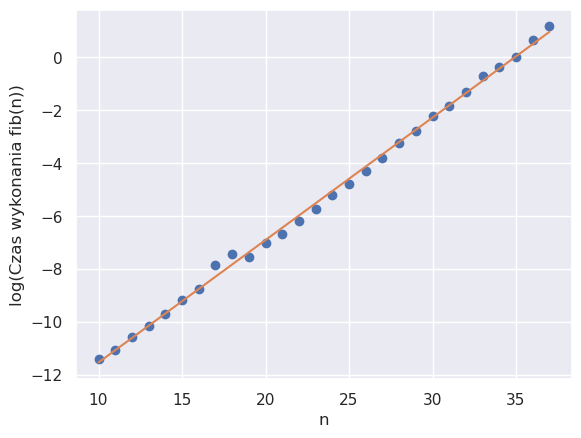

In [5]:
import numpy as np
import statsmodels.api as sm

logT = np.log(T)
regresja = sm.OLS(logT, sm.add_constant(N)).fit()
plt.plot(N, np.log(T), 'o')
plt.plot(N, regresja.predict(sm.add_constant(N)))
plt.xlabel('n')
plt.ylabel('log(Czas wykonania fib(n))');

In [6]:
regresja.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-16.1462,0.101,-159.417,0.000,-16.354,-15.938
x1,0.4623,0.004,113.426,0.000,0.454,0.471


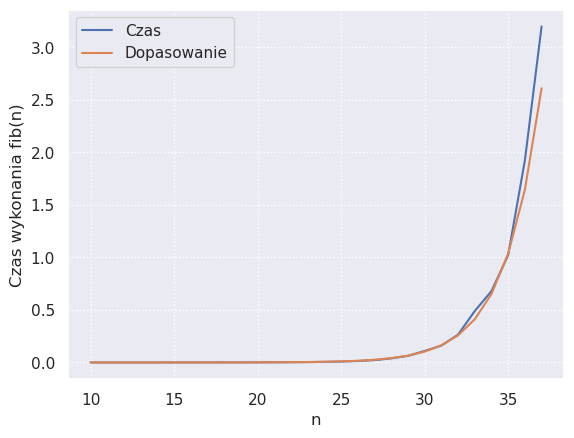

In [7]:
q = np.exp(regresja.params[1]) # wykładnik q odczytany z regresji
a = np.exp(regresja.params[0]) # współczynnik a odczytany z regresji

geom = [a * q**n for n in N]

plt.plot(N, T, label='Czas')
plt.plot(N, geom, label='Dopasowanie')
plt.xlabel('n')
plt.ylabel('Czas wykonania fib(n)')
plt.legend()
plt.grid(ls=':')

"Na oko" dopasowanie wygląda na całkiem przyzwoite, prawdziwy czas jest nieco zaniżony. Jakość dopasowania z punktu widzenia statystyki możesz ocenić analizując tabelę zwracaną przez `regresja.summary()`.

Zauważ, że średnia ilorazów `q` ma wartość bliską złotej liczbie; nie jest to przypadek (SICP, $\S$1.2.2):

In [8]:
q, (1 + 5**(1/2)) / 2

(np.float64(1.5877308004873318), 1.618033988749895)

Akceptując powyższe dopasowanie możemy spróbować oszacować, ile czasu zajęłoby wykonanie `fib(100)`.

W sekundach:

In [9]:
a * q**100

np.float64(11627763131113.328)

Czyli w latach:

In [10]:
print(f"{a * q**100 / 3600 / 24 / 365:.2e} lat")

3.69e+05 lat


Czas oczekiwania rzędu "setki tysięcy lat" :-)

Zwróć uwagę, że mówimy tu o czasie. Wywołanie `fib(n)` jest bardzo czasochłonne, nie wymaga jednak dużej pamięci. Lista odłożonych w danej chwili operacji jest taka jak głębokość drzewa, czyli jest proporcjonalna do `n`. Nie ma tu zatem wiele do pamiętania.

### Liczba wywołań rekurencyjnych

Dokładniejsze wyniki szacujące złożoność wywołania dostaniemy obliczając dokładnie liczbę wywołań rekurencyjnych funkcji `fib()`. Na przykład z drzewa wyrysowanego wyżej widzimy, że dla `fib(6)` mamy dokładnie 25 wywołań `fib()` (węzłów jest 15, ale każde `fib(2)` daje dwa dodatkowe wywołania: `fib(0)` i `fib(1)`). A ile by ich było dla `fib(35)`? A dla `fib(100)`?

Wielkość tę można obliczyć teoretycznie. My postąpimy praktycznie zmuszając funkcję, aby sama pamiętała i aktualizowała liczbę swoich wywołań. Liczbę tę wygodnie będzie przechowywać jako atrybut funkcji.

Gdy zdefiniujesz jakąś funkcję, powiedzmy o nazwie `funkcja`, to możesz jej przypisać atrybut zgodnie ze składnią
```python
funkcja.nazwa_atrybutu = wartość
```

In [11]:
def fun():
    pass

fun.napis = 'Jestem atrybutem!'
fun.liczba = 9 ** 9

In [12]:
fun.napis, fun.liczba

('Jestem atrybutem!', 387420489)

Atrybuty zdefiniowane przez użytkownika przechowuje atrybut `__dict__` w postaci słownika.

In [13]:
fun.__dict__

{'napis': 'Jestem atrybutem!', 'liczba': 387420489}

Napiszmy zatem dekorator, który doda atrybut `liczba_wywołań` do zmodyfikowanej funkcji. Atrybut ten ustawiamy na zero, przy każdorazowym wywołaniu funkcji jego wartość podnosimy o jeden:

In [14]:
from functools import wraps

def licz_wywołania(f):
    '''Przechowuje liczbę wywołań f() w atrybucie f.liczba_wywołań.'''
    @wraps(f)
    def licznik(*args, **kwargs):
        wynik = f(*args, **kwargs)
        licznik.liczba_wywołań += 1
        return wynik
    licznik.liczba_wywołań = 0
    return licznik

In [15]:
@licz_wywołania
def suma_naturalnych(n):
    '''Zwraca 1 + 2 + ... + n'''
    if n == 0:
        return 0
    return n + suma_naturalnych(n - 1)

In [16]:
suma_naturalnych.liczba_wywołań

0

In [17]:
suma_naturalnych(5)

15

In [18]:
suma_naturalnych.liczba_wywołań

6

In [19]:
@licz_wywołania
def fib(n):
    '''Zwraca wyraz F_n, n >= 0 ciągu Fibonacciego.'''
    if n == 0 or n == 1:
        return n
    
    return fib(n - 1) + fib(n - 2)

In [20]:
fib.liczba_wywołań

0

In [21]:
fib(6)

8

In [22]:
fib.liczba_wywołań

25

Tak jak poprzednio z czasami wykonania znów robimy tabelę, teraz z liczbami wywołań rekurencyjnych. Wyniki są dokładne, więc małych wartości nie musimy pomijać:

In [23]:
%%time
N, LICZBA_WYWOŁAŃ = [], []

for n in range(38):
    # Reset atrybutu dla nowego wywołania
    fib.liczba_wywołań = 0
    w = fib(n)
    N.append(n)
    LICZBA_WYWOŁAŃ.append(fib.liczba_wywołań)
    print(f'{n:<3}: {w:<10}| Liczba wywołań: {fib.liczba_wywołań}')

0  : 0         | Liczba wywołań: 1
1  : 1         | Liczba wywołań: 1
2  : 1         | Liczba wywołań: 3
3  : 2         | Liczba wywołań: 5
4  : 3         | Liczba wywołań: 9
5  : 5         | Liczba wywołań: 15
6  : 8         | Liczba wywołań: 25
7  : 13        | Liczba wywołań: 41
8  : 21        | Liczba wywołań: 67
9  : 34        | Liczba wywołań: 109
10 : 55        | Liczba wywołań: 177
11 : 89        | Liczba wywołań: 287
12 : 144       | Liczba wywołań: 465
13 : 233       | Liczba wywołań: 753
14 : 377       | Liczba wywołań: 1219
15 : 610       | Liczba wywołań: 1973
16 : 987       | Liczba wywołań: 3193
17 : 1597      | Liczba wywołań: 5167


18 : 2584      | Liczba wywołań: 8361
19 : 4181      | Liczba wywołań: 13529
20 : 6765      | Liczba wywołań: 21891
21 : 10946     | Liczba wywołań: 35421
22 : 17711     | Liczba wywołań: 57313
23 : 28657     | Liczba wywołań: 92735
24 : 46368     | Liczba wywołań: 150049
25 : 75025     | Liczba wywołań: 242785
26 : 121393    | Liczba wywołań: 392835
27 : 196418    | Liczba wywołań: 635621
28 : 317811    | Liczba wywołań: 1028457
29 : 514229    | Liczba wywołań: 1664079
30 : 832040    | Liczba wywołań: 2692537
31 : 1346269   | Liczba wywołań: 4356617
32 : 2178309   | Liczba wywołań: 7049155
33 : 3524578   | Liczba wywołań: 11405773
34 : 5702887   | Liczba wywołań: 18454929
35 : 9227465   | Liczba wywołań: 29860703
36 : 14930352  | Liczba wywołań: 48315633
37 : 24157817  | Liczba wywołań: 78176337
CPU times: user 51.8 s, sys: 83.9 ms, total: 51.9 s
Wall time: 51.9 s


Wyniki prezentujemy na wykresie:

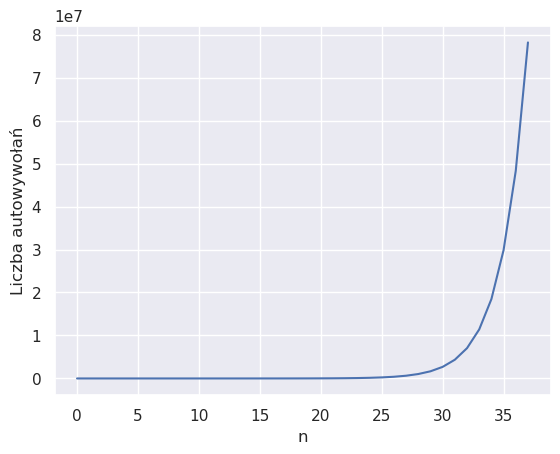

In [24]:
plt.plot(N, LICZBA_WYWOŁAŃ)
plt.xlabel('n')
plt.ylabel('Liczba autowywołań');

Popatrzmy jeszcze na ilorazy. W zbadanym zakresie stałość nie budzi wątpliwości:

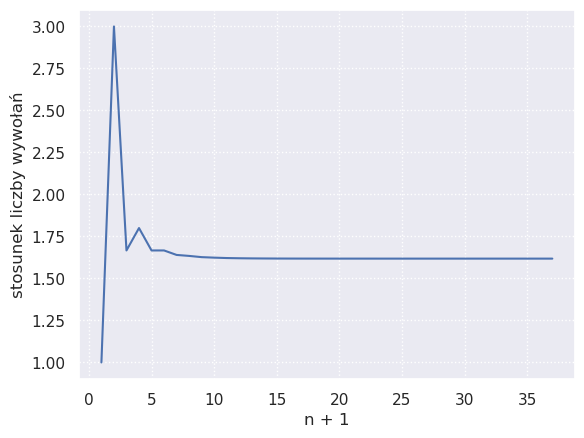

In [25]:
ilorazy = []
a = LICZBA_WYWOŁAŃ[0]

for b in LICZBA_WYWOŁAŃ[1:]:
    ilorazy.append(b / a)
    a = b

plt.plot(range(1, 38), ilorazy)
plt.xlabel('n + 1')
plt.ylabel('stosunek liczby wywołań')
plt.grid(ls=':')

Można wykazać, że wartość tego stosunku ma granicę w nieskończoności równą złotej liczbie:

In [26]:
LICZBA_WYWOŁAŃ[-1] / LICZBA_WYWOŁAŃ[-2], (1 + 5**(1/2)) / 2

(1.6180340015414887, 1.618033988749895)

In [27]:
abs(LICZBA_WYWOŁAŃ[-1]/LICZBA_WYWOŁAŃ[-2] - (1 + 5**(1/2)) / 2)

1.2791593784200472e-08

Zatem `fib(n + 1)` wywołuje funkcję `fib()` około `1.618` raza więcej niż `fib(n)`. Ile wywołań rekurencyjnych wymaga obliczenie `fib(100)`? Ponieważ dla `fib(30)` jest ich `832040`, więc dla `fib(100)` będzie około

In [28]:
832040 * 1.618**(100 - 30)

3.53704361150542e+20

czyli 3,5 razy 10<sup>20</sup>.

### Ratowanie definicji rekurencyjnej

W bezpośredniej implementacji definicji rekurencyjnej ciągu Fibonacciego problemem jest to, że na jednej i tej samej liczbie `k` funkcja `fib()` wywoływana jest wielokrotnie.

Z kłopotem tym poradzimy sobie zapamiętując wyniki pośrednie:

In [29]:
pamięć = {}

def fib_z_pamięcią(n):
    '''Zwraca wyraz F_n, n >= 0 ciągu Fibonacciego.'''
    if n == 0 or n == 1:
        return n
    
    if n not in pamięć:
        pamięć[n] = fib_z_pamięcią(n - 2) + fib_z_pamięcią(n - 1)
        
    return pamięć[n]

Dla `fib(5)` mamy 9 wywołań zamiast 15. To oraz rolę słownika zapamiętującego widać wyraźnie na diagramie. Narysuj sam taki diagram dla `fib(6)`.

<br><br>

<center>
    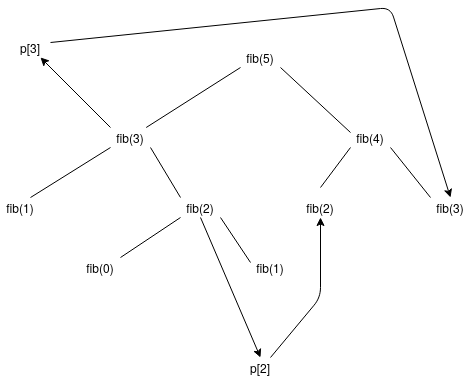
</center>

Sprawdźmy liczbę wywołań.

In [30]:
pamięć = {}

@licz_wywołania
def fib_z_pamięcią(n):
    '''Zwraca wyraz F_n, n >= 0 ciągu Fibonacciego.'''
    if n == 0 or n == 1:
        return n
    
    if n not in pamięć:
        pamięć[n] = fib_z_pamięcią(n - 2) + fib_z_pamięcią(n - 1)
        
    return pamięć[n]

In [31]:
fib_z_pamięcią(5)

5

In [32]:
fib_z_pamięcią.liczba_wywołań

9

Reset liczby wywołań:

In [33]:
fib_z_pamięcią.liczba_wywołań = 0

In [34]:
fib_z_pamięcią(100)

354224848179261915075

In [35]:
fib_z_pamięcią.liczba_wywołań

191

No i proszę. Z milionów lat zeszliśmy do nanosekund :-)

In [36]:
%timeit fib_z_pamięcią(100)

282 ns ± 31.1 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


### Dekorator zapamiętujący

Podany wyżej chwyt z pamięcią można przełożyć na dekorator zapamiętujący stosowalny do funkcji jednej zmiennej.

In [37]:
def zapamiętuj(f):
    pamięć = {}
    @wraps(f)
    def wrapper(x):
    
        if x not in pamięć:
            pamięć[x] = f(x)
        
        return pamięć[x]
    
    return wrapper

Możemy go zastosować do poprzedniej funkcji `fib()`. Dzięki użyciu dekoratora zachowujemy czytelność definicji rekurencyjnej.

In [38]:
@zapamiętuj
def fib(n):
    '''Zwraca wyraz F_n, n >= 0 ciągu Fibonacciego.'''
    if n == 0 or n == 1:
        return n
    
    return fib(n - 2) + fib(n - 1)

In [39]:
fib(100)

354224848179261915075

Dekoratory możemy spiętrzyć.

In [40]:
@licz_wywołania
@zapamiętuj
def fib(n):
    '''Zwraca wyraz F_n, n >= 0 ciągu Fibonacciego.'''
    if n == 0 or n == 1:
        return n
    
    return fib(n - 2) + fib(n - 1)

In [41]:
fib(200)

280571172992510140037611932413038677189525

In [42]:
fib.liczba_wywołań

399

### `functools.lru_cache`

Dekorator `lru_cache()` z modułu `functools` implementuje memoizację (czyli zapamiętywanie pośrednich wyników):

In [43]:
from functools import lru_cache

@lru_cache()
def fib(n):
    '''Zwraca wyraz F_n, n >= 0 ciągu Fibonacciego.'''

    if n == 0 or n == 1:
        return n
    
    return fib(n - 1) + fib(n - 2)

`lru_cache()` również przyjmuje parametry. Dlatego należy go pisać z nawiasami okrągłymi -- nawet wtedy, gdy żadnych argumentów nie wprowadzamy.

In [44]:
%timeit -n 20000 fib(200)

62.9 ns ± 12.2 ns per loop (mean ± std. dev. of 7 runs, 20,000 loops each)


In [45]:
help(fib)

Help on _lru_cache_wrapper in module __main__:

fib(n)
    Zwraca wyraz F_n, n >= 0 ciągu Fibonacciego.

